<a href="https://colab.research.google.com/github/FRNEYRA10/FRNEYRA10/blob/main/Tarea_Met_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import math

# Variables simbólicas
x = sp.symbols('x')
a2, a3 = sp.symbols('a2 a3')

# Aproximación cúbica usando condiciones iniciales
uN = 2*x + a2*x**2 + a3*x**3

# Residual del método de colocación: r = u'' + u - x
r = sp.diff(uN, x, 2) + uN - x

# Ecuaciones de colocación en x=1/2 y x=1
eq1 = sp.simplify(r.subs(x, sp.Rational(1, 2)))
eq2 = sp.simplify(r.subs(x, 1))

# Resolver coeficientes
sol = sp.solve([eq1, eq2], [a2, a3])
print("Coeficientes obtenidos por colocación:")
print(sol)

# Sustituimos en la aproximación
uN_final = sp.simplify(uN.subs(sol))
print("\nAproximación cúbica u_N(x):")
print(uN_final)

# Solución exacta del problema: u(x) = x + sin(x)
u_exact = x + sp.sin(x)

# Error simbólico
error = sp.simplify(u_exact - uN_final)
print("\nError simbólico E(x) = u(x) - u_N(x):")
print(error)

# Error máximo numérico en [0,1]
f_err = sp.lambdify(x, sp.Abs(error), 'math')
xs = np.linspace(0, 1, 5001)
Emax = max(f_err(t) for t in xs)

print("\nError máximo en [0,1]:")
print(Emax)


Coeficientes obtenidos por colocación:
{a2: -1/17, a3: -2/17}

Aproximación cúbica u_N(x):
x*(-2*x**2 - x + 34)/17

Error simbólico E(x) = u(x) - u_N(x):
2*x**3/17 + x**2/17 - x + sin(x)

Error máximo en [0,1]:
0.01794157304319066


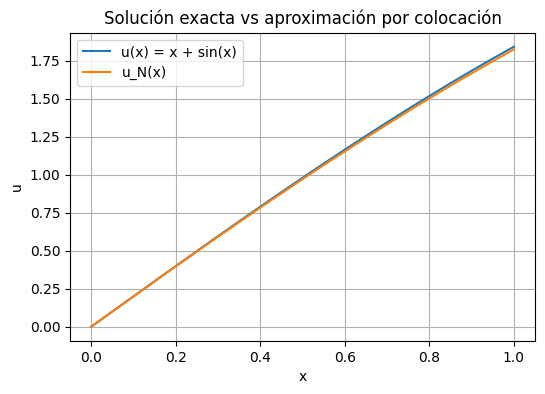

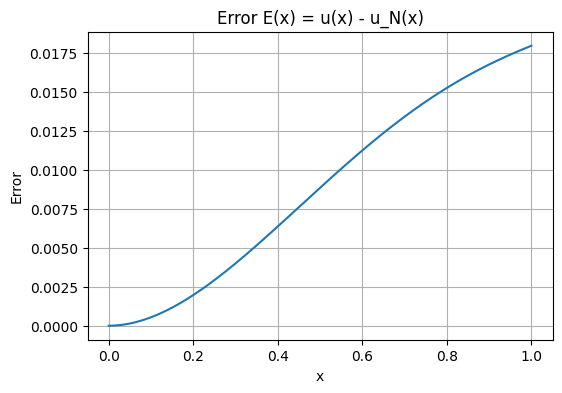

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Symbols and expressions
x = sp.symbols('x')
u_exact = x + sp.sin(x)
uN = 2*x - x**2/sp.Integer(17) - 2*x**3/sp.Integer(17)
err = sp.simplify(u_exact - uN)

# Lambdify for plotting
f_exact = sp.lambdify(x, u_exact, 'numpy')
f_uN = sp.lambdify(x, uN, 'numpy')
f_err = sp.lambdify(x, err, 'numpy')

# Domain
xs = np.linspace(0, 1, 400)

# Plot exact vs approximate
plt.figure(figsize=(6,4))
plt.plot(xs, f_exact(xs))
plt.plot(xs, f_uN(xs))
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solución exacta vs aproximación por colocación")
plt.legend(["u(x) = x + sin(x)", "u_N(x)"])
plt.grid(True)
plt.show()

# Plot error
plt.figure(figsize=(6,4))
plt.plot(xs, f_err(xs))
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error E(x) = u(x) - u_N(x)")
plt.grid(True)
plt.show()
